In [47]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split

## Exploratory Data Analysis

In this part we will try to get insights in the data. We will also visualize it to see different relationships between features

In [48]:
# Exploratory data analysis (EDA)

df = pd.read_csv('../datasets/Data_Q3/D21.csv')

In [49]:
# first few rows of original data
df.head()

,Unnamed: 0,1,2,3,4,5,6,7
0,0,0.046303,0.028466,0.151624,0.007990,0.005973,0.003635,1
1,1,0.132203,0.296852,-0.068419,0.146222,0.357298,0.150411,0
2,2,-0.210474,0.144329,0.018591,0.097309,0.122228,0.090209,1
3,3,0.007505,-0.184451,-0.051672,0.009168,0.023768,0.011703,1
4,4,-0.081010,0.124602,-0.033422,0.046270,0.032020,0.008429,1


In [50]:
list(df)

['Unnamed: 0', '1', '2', '3', '4', '5', '6', '7']

In [51]:
#deleting the first column since it is use less numbering only

my_df = df.drop('Unnamed: 0', axis = 1)
my_df.head()

,1,2,3,4,5,6,7
0,0.046303,0.028466,0.151624,0.007990,0.005973,0.003635,1
1,0.132203,0.296852,-0.068419,0.146222,0.357298,0.150411,0
2,-0.210474,0.144329,0.018591,0.097309,0.122228,0.090209,1
3,0.007505,-0.184451,-0.051672,0.009168,0.023768,0.011703,1
4,-0.081010,0.124602,-0.033422,0.046270,0.032020,0.008429,1


In [52]:
#counting the number of lables ( it is an unbalanced dataset )
my_df['7'].value_counts()

1    1802
0     452
Name: 7, dtype: int64

In [53]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 7 columns):
1    2254 non-null float64
2    2254 non-null float64
3    2254 non-null float64
4    2254 non-null float64
5    2254 non-null float64
6    2254 non-null float64
7    2254 non-null int64
dtypes: float64(6), int64(1)
memory usage: 123.3 KB


In [54]:
my_df.describe()

,1,2,3,4,5,6,7
count,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000,2254.000000
mean,0.055471,0.097492,0.015423,0.047272,0.052910,0.052747,0.799468
std,0.145812,0.174923,0.121642,0.064531,0.076833,0.071523,0.400488
min,-0.458801,-0.717313,-0.607233,0.000000,0.000000,0.000000,0.000000
25%,-0.037985,-0.008967,-0.051737,0.011973,0.008963,0.008504,1.000000
50%,0.062039,0.107267,0.010764,0.023644,0.022970,0.022632,1.000000
75%,0.134210,0.225356,0.078702,0.053722,0.062584,0.070451,1.000000
max,0.774888,0.701873,0.656722,0.676036,0.645487,0.691162,1.000000


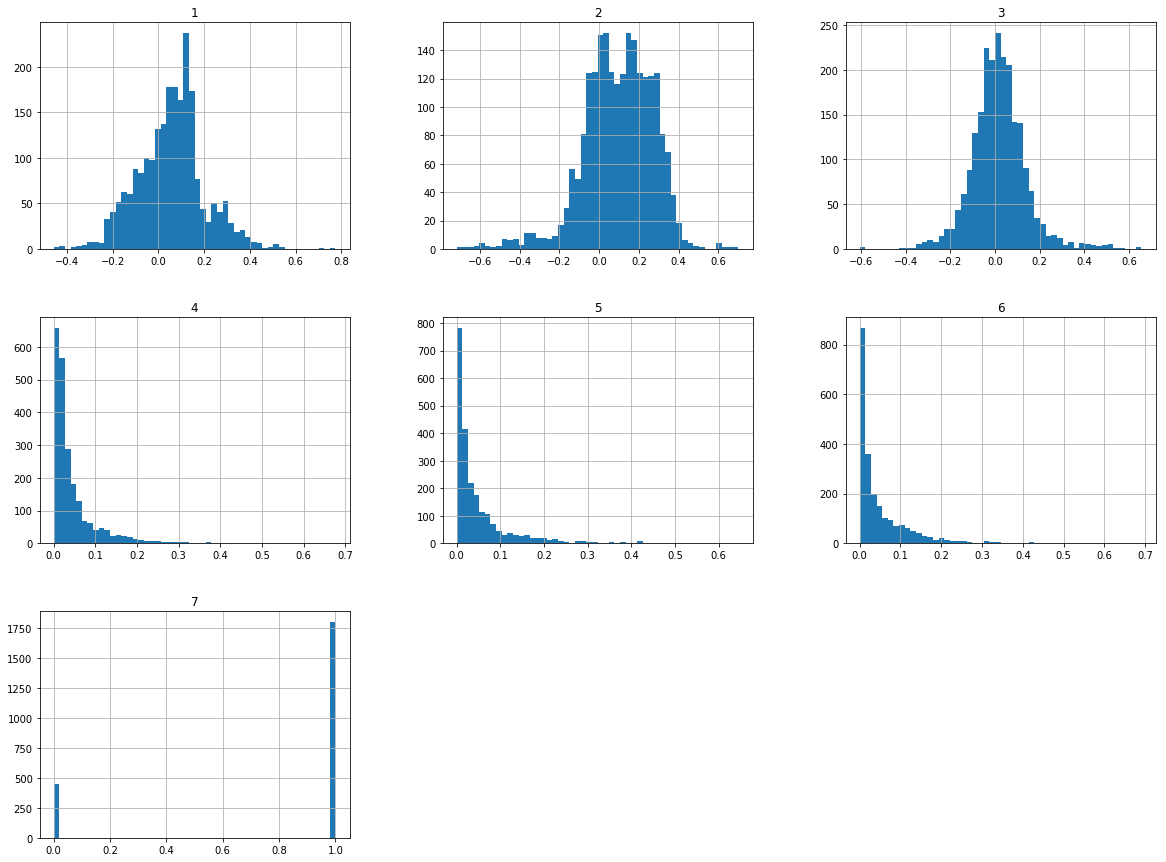

In [55]:
# plotting histograms of the features and also label
my_df.hist(bins=50, figsize=(20,15))
plt.show()

Looking for Correlations

In [56]:
corr_matrix = my_df.corr()

In [57]:
corr_matrix['7'].sort_values(ascending = False)

7    1.000000
2    0.072545
3    0.004242
1   -0.117944
6   -0.279816
4   -0.398477
5   -0.491877
Name: 7, dtype: float64

In [58]:
corr_matrix

,1,2,3,4,5,6,7
1,1.000000,-0.213905,0.055283,-0.040040,0.017195,-0.081457,-0.117944
2,-0.213905,1.000000,-0.045076,-0.054145,-0.079767,0.112730,0.072545
3,0.055283,-0.045076,1.000000,-0.017537,-0.069442,0.010132,0.004242
4,-0.040040,-0.054145,-0.017537,1.000000,0.663467,0.575025,-0.398477
5,0.017195,-0.079767,-0.069442,0.663467,1.000000,0.589606,-0.491877
6,-0.081457,0.112730,0.010132,0.575025,0.589606,1.000000,-0.279816
7,-0.117944,0.072545,0.004242,-0.398477,-0.491877,-0.279816,1.000000


Above we observe that feature 3 is not correlated to any of the features so we can remove it if we want

#### Check for null values

In [59]:
my_df.isnull().any()

1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

Since there are no null values in our data set we are now finished with the EDA

Now we can move on to the machine learning part

In [60]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [61]:
# dividing data to features and labels
data = np.array(my_df)
X = data[:,:6]
Y = data[:,6:]

In [62]:
# splitting data into training and test

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

### First doing logistic regression using scikit learn library

In [63]:
clf = LogisticRegression( C = 20)

In [64]:
start_time = time.time()

clf.fit(x_train, y_train)

end_time = time.time()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
y_pred = clf.predict(x_test)

In [66]:
print('Execution time : ' + str(end_time - start_time) + ' seconds ')
print('Accuracy using scikit learn Logistic Regression : ' + str(100 * accuracy_score(y_test, y_pred) ) )
print('Precision : ' + str(precision_score(y_test, y_pred, average='weighted')))
print('Recall : ' + str(recall_score(y_test, y_pred, average='weighted')))
print('F1_score : ' + str(f1_score(y_test, y_pred, average='weighted')))
print('Roc_Auc_score : ' + str(roc_auc_score( y_test, y_pred )))

Execution time : 0.003007173538208008 seconds 
Accuracy using scikit learn Logistic Regression : 84.9223946785
Precision : 0.838804327893
Recall : 0.849223946785
F1_score : 0.824165539152
Roc_Auc_score : 0.652376033058


### Doing Nearest Neighbour Classification

In [67]:
start_time = time.time()
pred = []
for j in range(len(x_test)):
    sample = x_test[j]
    min_dist = 9999
    for i in range(len(x_train)):

        temp = x_train[i]
        #calculating norm
        
        dist = np.linalg.norm(sample - temp)
        
        if(dist<min_dist):
            min_dist = dist
            index = i
    #appending the prediction
    pred.append(index)

    count = 0
    
end_time = time.time()

y_pred =[]

for i in range(len(pred)):
    if(y_train[pred[i]] == y_test[i]):
        count = count + 1
    y_pred.append(y_train[pred[i]])

        
acc = (float(count)/float(len(pred))) * 100       

In [68]:
print("Accuracy : {:.5f}%".format(acc))
print('Precision : ' + str(precision_score(y_test, y_pred, average= 'weighted')))
print('Execution time : ' + str(end_time - start_time) + ' seconds ')
print('Recall : ' + str(recall_score(y_test, y_pred, average = 'weighted')))
print('F1_score : ' + str(f1_score(y_test, y_pred, average = 'weighted')))
print('Roc_Auc_score : ' + str(roc_auc_score( y_test, y_pred )))

Accuracy : 82.48337%
Precision : 0.809603476266
Execution time : 3.7094690799713135 seconds 
Recall : 0.824833702882
F1_score : 0.814357077836
Roc_Auc_score : 0.671659779614


### Logistic Regression using gradient descent

In [69]:
from math import exp

# sigmoid or logistic function we are gonna use 
def sigmoid(scores):
    return ( 1.0 / (1.0 + np.exp(-scores)))



# finding log likelihood : we derived this L(w) where w is a vector of parameters we wnt to learn for which prob.
# of classlabel is maximized

# in following weights are parameters we want to learn for which we get the best or optimum answer
# features and labels (target vals) , scores is our hypothese function before applying sigmoid function
def log_likelihood(features, target, weights): 
    scores = np.dot(features, weights)      # scores is (wTranspose x) , target is yi or labels 
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )      #look at this eqn we have derived as log likelihood
    return ll

# by taking derivative of loglikelihood eqn or ll we will get a gradient : which we ll use here

def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1]).reshape(-1,1)     # intaliazing parameter values
    
    for step in range(num_steps):
        scores = np.array(np.dot(features, weights),dtype=np.float32 )    # h(x) = wT.x
        predictions = sigmoid(scores)      # our hypotheses function after applying sigmoid  : h(x) = sigmoid(wT.x) 
        

        # Update weights with gradient
        #print(target)
        #print(predictions)
        output_error_signal = target - predictions      #  target means yi or actual labels , predictions means p(xi) or predicted prob.
        gradient = np.dot(features.T, output_error_signal)    # this eqn we have derived : it is a derivative of ll : log likelihood
        
        weights += learning_rate * gradient       # forumula for G.D. Wnew = Wold + n * gradient : here + because we are maximizing
        
        # Print log-likelihood every so often
        #if step % 10000 == 0:
           # print(log_likelihood(features, target, weights))
            
    return weights

In [70]:
start = time.time()
#call to the function we have defined
weights = logistic_regression(x_train, y_train,num_steps = 10000, learning_rate = 0.001, add_intercept=True)
end =time.time()
# these are the parameter values we have learned for optimum ( maximum ) confidence for given class label : frm training data

In [71]:
# accuracy of logistic regression with gradient descent 

data_with_intercept = np.hstack((np.ones((x_test.shape[0], 1)),x_test))
final_scores = np.dot(data_with_intercept, weights)
y_pred = np.round(sigmoid(final_scores))         # we are rounding final predicted prob. to neareset class label 0 or 1

In [72]:
len(y_pred)

451

In [73]:
print("Accuracy : " + str(100 * accuracy_score( y_pred, y_test ) ) + " %")
print('Precision : ' + str(precision_score(y_test, y_pred, average= 'weighted')))
print('Execution time : ' + str(end - start) + ' seconds ')
print('Recall : ' + str(recall_score(y_test, y_pred, average = 'weighted')))
print('F1_score : ' + str(f1_score(y_test, y_pred, average = 'weighted')))
print('Roc_Auc_score : ' + str(roc_auc_score( y_test, y_pred )))

Accuracy : 84.7006651885 %
Precision : 0.834707068131
Execution time : 0.5269415378570557 seconds 
Recall : 0.847006651885
F1_score : 0.822328750999
Roc_Auc_score : 0.65099862259


### Logistic using Newton's Method

In [74]:


# sigmoid or logistic function we are gonna use 
def sigmoidN(scores):
    return ( 1.0 / (1.0 + np.exp(-scores)))



# finding log likelihood : we derived this L(w) where w is a vector of parameters we wnt to learn for which prob.
# of classlabel is maximized

# in following weights are parameters we want to learn for which we get the best or optimum answer
# features and labels (target vals) , scores is our hypothese function before applying sigmoid function
def log_likelihoodN(features, target, weights): 
    scores = np.dot(features, weights)      # scores is (wTranspose x) , target is yi or labels 
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )      #look at this eqn we have derived as log likelihood
    return ll

# by taking derivative of loglikelihood eqn or ll we will get a gradient : which we ll use here

def logistic_regression_newton(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1]).reshape(-1,1)     # intaliazing parameter values
    m = features.shape[0]
    for step in range(num_steps):
        scores = np.array(np.dot(features, weights),dtype = np.float64 )    # h(x) = wT.x
        predictions = sigmoidN(scores)      # our hypotheses function after applying sigmoid  : h(x) = sigmoid(wT.x) 
   
        sigma = np.dot(predictions, (1 - predictions).T)
        sigma = np.diag((sigma)[:,0])
        #print(np.shape(sigma))
        temp = np.dot(sigma, features)
        
        #the hessian matrix
        hessian = np.dot(features.T, temp)
        
        #inverse of hessian
        hessian_inv = np.linalg.inv(hessian) / m     

        # Update weights with gradient
        #print(target)
        #print(predictions)
        output_error_signal = target - predictions      #  target means yi or actual labels , predictions means p(xi) or predicted prob.
        gradient = np.dot(features.T, output_error_signal) / m  # this eqn we have derived : it is a derivative of ll : log likelihood
        #print(np.shape(target))
        weights += (np.dot(hessian_inv, gradient))       # forumula for G.D. Wnew = Wold + n * gradient : here + because we are maximizing
        
        # Print log-likelihood every so often
        #if step % 10000 == 0:
           # print(log_likelihood(features, target, weights))
            
    return weights

In [75]:
start = time.time()
#call to the function we have defined
weights = logistic_regression_newton(x_train, y_train,num_steps = 5, learning_rate = 0.001, add_intercept=True)
end =time.time()
# these are the parameter values we have learned for optimum ( maximum ) confidence for given class label : frm training data

In [76]:
# accuracy of logistic regression with gradient descent 

data_with_intercept = np.hstack((np.ones((x_test.shape[0], 1)),x_test))
final_scores = np.dot(data_with_intercept, weights)
y_pred = np.round(sigmoid(final_scores))         # we are rounding final predicted prob. to neareset class label 0 or 1

In [77]:
print("Accuracy : " + str(100 * accuracy_score( y_pred, y_test ) ) + " %")
print('Precision : ' + str(precision_score(y_test, y_pred, average= 'weighted')))
print('Execution time : ' + str(end - start) + ' seconds ')
print('Recall : ' + str(recall_score(y_test, y_pred, average = 'weighted')))
print('F1_score : ' + str(f1_score(y_test, y_pred, average = 'weighted')))
print('Roc_Auc_score : ' + str(roc_auc_score( y_test, y_pred )))

Accuracy : 83.8137472284 %
Precision : 0.82945364831
Execution time : 0.1498725414276123 seconds 
Recall : 0.838137472284
F1_score : 0.801481659146
Roc_Auc_score : 0.611053719008


### Gaussian Naive Bayes Classifier

In [78]:
df = pd.read_csv('../datasets/Data_Q3/D21.csv')

In [79]:
df.head()

,Unnamed: 0,1,2,3,4,5,6,7
0,0,0.046303,0.028466,0.151624,0.007990,0.005973,0.003635,1
1,1,0.132203,0.296852,-0.068419,0.146222,0.357298,0.150411,0
2,2,-0.210474,0.144329,0.018591,0.097309,0.122228,0.090209,1
3,3,0.007505,-0.184451,-0.051672,0.009168,0.023768,0.011703,1
4,4,-0.081010,0.124602,-0.033422,0.046270,0.032020,0.008429,1


In [80]:
#deleting the first column since it is use less numbering only
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,1,2,3,4,5,6,7
0,0.046303,0.028466,0.151624,0.007990,0.005973,0.003635,1
1,0.132203,0.296852,-0.068419,0.146222,0.357298,0.150411,0
2,-0.210474,0.144329,0.018591,0.097309,0.122228,0.090209,1
3,0.007505,-0.184451,-0.051672,0.009168,0.023768,0.011703,1
4,-0.081010,0.124602,-0.033422,0.046270,0.032020,0.008429,1


In [81]:
df.shape[1]-1

6

In [82]:
# defining a function to find mean and std dev of all features for given class

meanvector=[]
features_count = df.shape[1]-1

def findMeanVector(df):
    '''find mean vector for features of given dataframe'''
    for i in range(0,features_count):
        mean = df.ix[:,i].mean()
        meanvector.insert(i,mean)
        
    return meanvector

#defining a function to find std dev of all features for given class

stdvector=[]
features_count = df.shape[1]-1

def findStdVector(df):
    '''find std dev vector for features of given dataframe'''
    for i in range(0,features_count):
        std = df.ix[:,i].std()
        stdvector.insert(i,std)
        
    return stdvector

In [83]:
#gaussain pdf : calculateProbability() function

import math
def calculateProbability(x, mean, stdev):
    '''prob of feature given class label'''
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

def probOfClass(datapt , df):   # means given data point values u find prob of tht point belonging this class
    ''' will return prob of class label given features'''
    pr = 1
    meanVector = findMeanVector(df)
    stdVector = findStdVector(df)
    for i in range(0,6):    # 6 features
        pr *= calculateProbability(datapt.iat[0,i],meanVector[i],stdVector[i])
    return pr

In [84]:
#features = irisDf.values[:,:4]    # till 3rd column means exclusive of 4th coln whch is target
#target = irisDf.values[:,4]       # these are the target values or labels
  
#slicing data
#features_train, features_test, target_train, target_test = train_test_split(features,
#                                                                   target, test_size = 0.33, random_state = 10)

    
# this will give dataframes as output of splitting 
traindf,testdf = train_test_split(df,test_size=0.33)
print(traindf.head())

             1         2         3         4         5         6  7
629   0.009157  0.139985 -0.011941  0.023705  0.010136  0.011952  1
995   0.393912  0.089227 -0.087177  0.063640  0.021430  0.116388  0
2125 -0.222766  0.412373 -0.389669  0.013848  0.017464  0.014911  1
1656 -0.222004  0.103720  0.005680  0.005797  0.004121  0.003718  1
1593  0.262310  0.098346 -0.038579  0.066691  0.283348  0.033326  0


In [85]:
#seperate data by class

df0 = traindf.loc[traindf['7'] == 0]
df1 = traindf.loc[traindf['7'] == 1]

In [86]:
# defining a function to predict a class label

def predictClassLabel(datapt):
    '''predicts the class label for given data point'''
    pr_0 = probOfClass(datapt, df0)
    pr_1 = probOfClass(datapt, df1)
    
    m = max(pr_0, pr_1)
    
    if(m == pr_0):
        return 0
    else:
        return 1
        

In [87]:
#lets find accuracy : predict class labels for all test instances and then compare both of them

import time

y_pred = []

def findAccuracy(testdf):
    '''find accurcay of an algorithm'''
    count =0
    total =0

    for i in range(0,len(testdf)):
        prediction = predictClassLabel(testdf.iloc[i:i+1,0:6])       # taking row by row without label 

        if(prediction == testdf.iloc[i]['7']):            # comparing predicted label with actual label
            count += 1
        
        y_pred.append(prediction)
        total += 1

    return count/total


print(100 * findAccuracy(testdf))


# finding training time

t0 = time.time()
predictClassLabel(testdf.iloc[0:1,0:6])
tm = time.time()-t0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


81.31720430107528


In [88]:
y_pred = np.array(y_pred).reshape(-1,1)
y_test = np.array(testdf.iloc[:,6:])


In [89]:
print("Accuracy : " + str(100 * accuracy_score( y_pred, y_test ) ) + " %")
print('Precision : ' + str(precision_score(y_test, y_pred, average= 'weighted')))
print('Execution time : ' + str( tm ) + ' seconds ')
print('Recall : ' + str(recall_score(y_test, y_pred, average = 'weighted')))
print('F1_score : ' + str(f1_score(y_test, y_pred, average = 'weighted')))
print('Roc_Auc_score : ' + str(roc_auc_score( y_test, y_pred )))

Accuracy : 81.3172043011 %
Precision : 0.81170218457
Execution time : 0.005013704299926758 seconds 
Recall : 0.813172043011
F1_score : 0.812421690539
Roc_Auc_score : 0.696805555556
